In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data=pd.read_excel(r'C:\Users\Julaysa\Desktop\Telegram\Telegram1.xlsx')
data.head(5)

,Период,НаименованиеКонтрагента,Код,ДатаРегистрации,Подписан,Статус,НаименованиеКЛК,Должность,КаналРассылки,БылКликВнешнийИсточник,ВидПисьма,ТекстСообщения,ДатаКликаВнешнийИсточник,ДатаОтправкиПисьмаВнешнийИсточник,ИдентификаторПисьма,ИдПисьмаВнешнийИсточник,ПисьмоОткрытоВнешнийИсточник,ПисьмоОтправленоВнешнийИсточник
0,2022-06-02 11:00:02,"НИиПИ градостроительства, ГАУ МО (реорганиз. б...",34438,2022-04-28 00:00:00,0.0,Действующее,Петрухин Андрей Валентинович,зам. нач.,Telegram @Consultant_4DK_bot,Нет,Мероприятия ДИО,Прямо сейчас Вам доступны десятки мероприятий ...,NaN,2022-06-02 00:00:00,NaN,428179,Нет,Да
1,2022-07-28 11:00:04,"НИиПИ градостроительства, ГАУ МО (реорганиз. б...",34438,2022-04-28 00:00:00,0.0,Действующее,Петрухин Андрей Валентинович,зам. нач.,Telegram @Consultant_4DK_bot,Нет,Мероприятия ДИО,Прямо сейчас Вам доступны десятки мероприятий ...,NaN,2022-07-28 00:00:00,NaN,562149,Нет,Да
2,2023-04-27 11:00:04,"НИиПИ градостроительства, ГАУ МО (реорганиз. б...",34438,2022-04-28 00:00:00,0.0,Действующее,Петрухин Андрей Валентинович,зам. нач.,Telegram @Consultant_4DK_bot,Нет,Ответы ЛК,За один день мы обрабатываем более 700 обращен...,NaN,2023-04-27 00:00:00,6.381817e+13,1308953,Нет,Да
3,2022-06-01 11:00:25,"НИиПИ градостроительства, ГАУ МО (реорганиз. б...",34438,2022-04-28 00:00:00,0.0,Действующее,Петрухин Андрей Валентинович,зам. нач.,Telegram @Consultant_4DK_bot,Нет,Аналитика,Мы собрали для Вас самые важные новости законо...,NaN,2022-06-01 00:00:00,NaN,422706,Нет,Да
4,2022-06-15 11:00:04,"НИиПИ градостроительства, ГАУ МО (реорганиз. б...",34438,2022-04-28 00:00:00,0.0,Действующее,Петрухин Андрей Валентинович,зам. нач.,Telegram @Consultant_4DK_bot,Нет,Аналитика,Мы собрали для Вас самые важные новости законо...,NaN,2022-06-15 00:00:00,NaN,454055,Нет,Да


In [3]:
data.shape

(403972, 18)

In [4]:
# Преобразуем даты в тип datetime64[ns]
data['Период'] = pd.to_datetime(data['Период'])
data['ДатаКликаВнешнийИсточник'] = pd.to_datetime(data['ДатаКликаВнешнийИсточник'])
data['ДатаОтправкиПисьмаВнешнийИсточник'] = pd.to_datetime(data['ДатаОтправкиПисьмаВнешнийИсточник'])

data['Год_рассылки'] = data['Период'].dt.year
data['Год_отклика'] = data['ДатаКликаВнешнийИсточник'].dt.year
data['Месяц_рассылки'] = data['Период'].dt.month
data['Месяц_отклика'] = data['ДатаКликаВнешнийИсточник'].dt.month
data['День_недели_отклика'] = data['ДатаКликаВнешнийИсточник'].dt.dayofweek


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403972 entries, 0 to 403971
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Период                             403972 non-null  datetime64[ns]
 1   НаименованиеКонтрагента            403972 non-null  object        
 2   Код                                403972 non-null  int64         
 3   ДатаРегистрации                    335369 non-null  object        
 4   Подписан                           335369 non-null  float64       
 5   Статус                             361537 non-null  object        
 6   НаименованиеКЛК                    403972 non-null  object        
 7   Должность                          379539 non-null  object        
 8   КаналРассылки                      403972 non-null  object        
 9   БылКликВнешнийИсточник             403972 non-null  object        
 10  ВидПисьма           

In [18]:
# Добавляем столбец, с временем перехода в минутах
data['Время_перехода_минута']=(data['ДатаКликаВнешнийИсточник']-data['Период']).dt.total_seconds() / 60
data['Время_перехода_день']=(data['ДатаКликаВнешнийИсточник']-data['Период']).dt.days

# Оставляем данные с 2022 года 
data=data[data['Год_рассылки']>2021]
data.shape

(403090, 25)

# Количество отправленных сообщений

In [13]:
mail_count_date=data.groupby(['Год_рассылки','Месяц_рассылки'],as_index=False) \
.aggregate({'БылКликВнешнийИсточник':"count"}) \
.rename(columns={"БылКликВнешнийИсточник":"Количество писем"}) \
.sort_values(by=['Год_рассылки','Месяц_рассылки'], ascending=False)

mail_count_date_click=data[data['БылКликВнешнийИсточник']=='Да'].groupby(['Год_рассылки','Месяц_рассылки'],as_index=False) \
.aggregate({'БылКликВнешнийИсточник':"count"}) \
.rename(columns={"БылКликВнешнийИсточник":"Количество кликов"}) \
.sort_values(by=['Год_рассылки','Месяц_рассылки'], ascending=False)

mail_count_date['Количество кликов']=mail_count_date_click['Количество кликов']
mail_count_date['Процент кликов']=round(mail_count_date_click['Количество кликов']/mail_count_date['Количество писем'],2)*100
mail_count_date
# Отправленные сообщения по месяцам

,Год_рассылки,Месяц_рассылки,Количество писем,Количество кликов,Процент кликов
16,2023,5,14348,184,1.0
15,2023,4,38787,654,2.0
14,2023,3,39713,693,2.0
13,2023,2,32295,649,2.0
12,2023,1,26509,645,2.0
11,2022,12,36026,899,2.0
10,2022,11,31813,714,2.0
9,2022,10,27569,733,3.0
8,2022,9,30691,1133,4.0
7,2022,8,27579,1093,4.0


# Сравним 9 и 10 месяц

In [14]:
# month=[9,10]
# mail_count_date_m=data[data['Месяц_рассылки'].isin(month)]\
# .groupby(['Год_рассылки','Месяц_рассылки','ВидПисьма'],as_index=False) \
# .aggregate({'БылКликВнешнийИсточник':"count"}) \
# .rename(columns={"БылКликВнешнийИсточник":"Количество писем"}) \
# .sort_values(by=['Год_рассылки','Месяц_рассылки'], ascending=False)


# mail_count_date_click_m=data[data['БылКликВнешнийИсточник']=='Да'] \
# .groupby(['Год_рассылки','Месяц_рассылки','ВидПисьма'],as_index=False) \
# .aggregate({'БылКликВнешнийИсточник':"count"}) \
# .rename(columns={"БылКликВнешнийИсточник":"Количество кликов"}) \
# .sort_values(by=['Год_рассылки','Месяц_рассылки'], ascending=False)
# mail_count_date_click_m[mail_count_date_click_m['Месяц_рассылки'].isin(month)]

# mail_count_date_new=mail_count_date_m.set_index(['Год_рассылки','Месяц_рассылки','ВидПисьма'])\
# .join(mail_count_date_click_m.set_index(['Год_рассылки','Месяц_рассылки','ВидПисьма'])) 

# mail_count_date_new

# Количество кликов

In [15]:
click=data.groupby(['БылКликВнешнийИсточник'],as_index=False) \
.aggregate({'ПисьмоОтправленоВнешнийИсточник':"count"}) \
.rename(columns={"ПисьмоОтправленоВнешнийИсточник":"Количество"}) 
click

,БылКликВнешнийИсточник,Количество
0,Да,12046
1,Нет,391044


([<matplotlib.patches.Wedge at 0x15aae1eed90>,
 [Text(1.095155766416363, 0.10312054734624436, 'Да'),
  Text(-1.2942750023790162, -0.12186967718344857, 'Нет')],
 [Text(0.5973576907725615, 0.05624757127976964, '3.0%'),
  Text(-0.7964769245409329, -0.07499672442058372, '97.0%')])

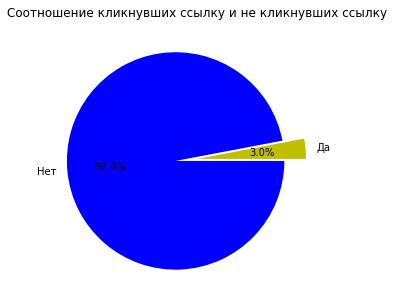

In [16]:
plt.figure(figsize=(5, 5))
values=click['Количество']
name=click['БылКликВнешнийИсточник']
colors=["y","b"]
plt.title("Cоотношение кликнувших ссылку и не кликнувших ссылку")
explode=[0,0.2]
plt.pie(values,colors=colors,labels=name,explode=explode,autopct='%1.1f%%')

In [17]:
date_start=min(data['Период'])
date_stop=max(data['Период'])
print(f'Период рассылки от {date_start} до {date_stop}')

Период рассылки от 2022-01-12 11:00:01 до 2023-05-11 20:01:21


Вывод:
- За период рассылки от 2022-01-12 11:00:01 до 2023-05-11 20:01:21 отправлено 403090 писем;
- По 12046 письмам был переход по ссылке, 391044 писем остались без перехода;
- 3% получивших рассылку в Telegram переходят по ссылке;

# Анализ по перешедшим по ссылке (кликнули)

In [19]:
data_click=data[data['БылКликВнешнийИсточник']=='Да']
data_top=data_click.groupby(['НаименованиеКонтрагента','НаименованиеКЛК','Должность'],as_index=False) \
.aggregate({'БылКликВнешнийИсточник':"count",'Время_перехода_день':"mean",'Время_перехода_минута':"mean"}) \
.rename(columns={"БылКликВнешнийИсточник":"Количество","Время_перехода":"Среднее время перехода днях"}) \
.sort_values(by='Количество', ascending=False)
data_top.head(50)
#50 пользователей, которые чаще всего переходили по ссылке 

,НаименованиеКонтрагента,НаименованиеКЛК,Должность,Количество,Время_перехода_день,Время_перехода_минута
2239,"Тера-Линк, ООО",Антонюк Ирина Александровна,Гл. бух.,54,0.425926,742.639506
773,"ЖИЛКОМСЕРВИСПЛЮС, ООО",Королев Алексей Сергеевич,юрист,47,2.297872,3811.112057
2324,Управление по конкурентной политике и координа...,Исаева Ирина Алексеевна,Гл. бух.,46,1.173913,2029.202536
251,"Арк-он, ООО (ранее до 06.06.18 АО, до 22.12.17...",Кудиярова Марина Сергеевна,Гл. бух.,41,3.756098,5632.482520
333,"БУДЬ ЗДОРОВ, ООО",Лаврентьева Лариса Сергеевна,Гл. бух.,39,0.307692,670.494017
2017,"СерВис, ООО",Жардецкая Ирина Геннадьевна,Гл. бух.,37,6.972973,10448.214865
1826,"РосИнтер Ресторанс, ООО",Волгина Светлана Генриховна,зам. гл. бух.,36,4.250000,7010.968981
2470,"Центр гигиены и эпидемиологии в городе Москве,...",Клаузнер Татьяна Николаевна,нач. отд. кадров,36,40.750000,59348.481019
78,"АЛЬТЭКИ, СК, ООО",Мордвинова Наталья Анатольевна,Гл. бух.,36,0.638889,1527.700926
95,"АНИС ФУД, ООО",Саратовская Елена Анатольевна,Гл. бух.,35,3.428571,5328.361905


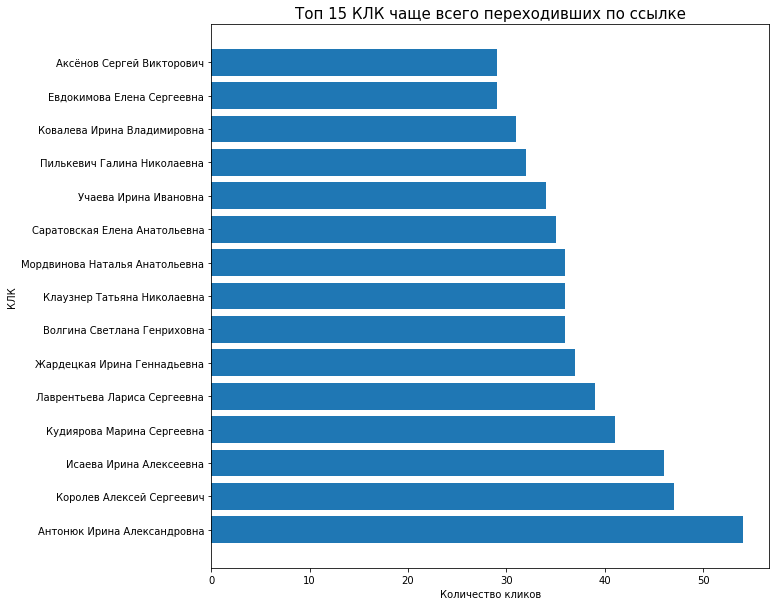

In [20]:
plt.figure(figsize=(10, 10))
plt.barh(data_top['НаименованиеКЛК'].head(15), data_top['Количество'].head(15), label='КЛвК')
plt.xlabel("Количество кликов")
plt.ylabel("КЛК")
plt.title('Топ 15 КЛК чаще всего переходивших по ссылке', fontsize=15)
plt.show()

In [21]:
data_top_mail=data[data['БылКликВнешнийИсточник']=='Да'].groupby(['ВидПисьма'],as_index=False) \
.aggregate({'БылКликВнешнийИсточник':"count",'Время_перехода_день':"mean",'Время_перехода_минута':"mean"}) \
.rename(columns={"БылКликВнешнийИсточник":"Количество_кликов","Время_перехода":"Среднее время перехода днях"}) \
.sort_values(by='Количество_кликов', ascending=False)
data_top_mail
#Количество по виду писем

,ВидПисьма,Количество_кликов,Время_перехода_день,Время_перехода_минута
0,Аналитика,6305,3.902934,5961.989955
3,Ответы ЛК,3102,5.677305,8561.884639
2,Мероприятия ДИО,2405,5.953015,8969.084019
1,Аналитика ДП,234,8.012821,11931.950214


([<matplotlib.patches.Wedge at 0x15aa63d6670>,
 [Text(-0.08082714237755027, 1.097026423134411, 'Аналитика'),
  Text(-0.6343891136608333, -0.8986381098465737, 'Ответы ЛК'),
  Text(0.8053993315033091, -0.7492208731836181, 'Мероприятия ДИО'),
  Text(1.2975799473582614, -0.07928606569714042, 'Аналитика ДП')],
 [Text(-0.04408753220593651, 0.5983780489824059, '52.3%'),
  Text(-0.34603042563318176, -0.4901662417344947, '25.8%'),
  Text(0.4393087262745322, -0.40866593082742797, '20.0%'),
  Text(0.7985107368358533, -0.0487914250443941, '1.9%')])

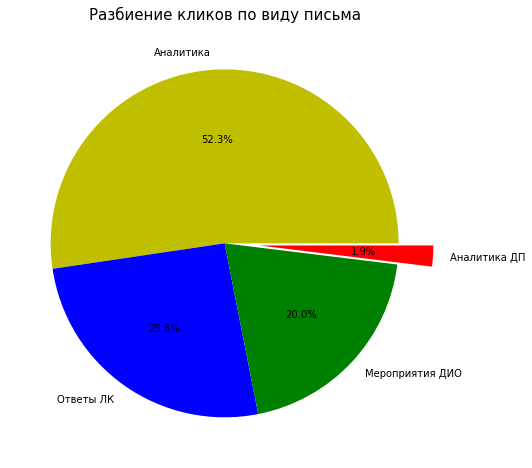

In [22]:
plt.figure(figsize=(8, 8))
values=data_top_mail['Количество_кликов']
name=data_top_mail['ВидПисьма']
colors=["y","b","g","r"]
plt.title("Разбиение кликов по виду письма", fontsize=15)
explode=[0,0,0,0.2]
plt.pie(values,colors=colors,labels=name,explode=explode,autopct='%1.1f%%')

Вывод:
- 52.3% кликов приходятся на тему, Аналитика;
- Ответы ЛК и Мероприятия ДИО, каждый около 1/4 кликов составляют;
- Аналитик ДП, является самой не популярной по кликам.

In [25]:
top_mail=set(data_top_mail['ВидПисьма'])
all_mail=set(data['ВидПисьма'].unique())
print('Список Видов писем, по которым вообще нет кликов')
not_click=list(all_mail - top_mail)
not_click

Список Видов писем, по которым вообще нет кликов


['Благодарность за оплату счета ДИО',
 'Оплатите счет что бы получить подарок БЕЗ кнопки',
 'Предложение перейти на ЭДО',
 'Напоминание о необходимости оплатить счёт БЕЗ кнопки',
 'Напоминание о необходимости подписать акт',
 'Оплатите счет что бы получить подарок с кнопкой',
 'Напоминание о необходимости оплатить счёт с кнопкой']

In [26]:
mail_not=data.groupby(['ВидПисьма'],as_index=False) \
.aggregate({'БылКликВнешнийИсточник':"count"}) \
.rename(columns={"БылКликВнешнийИсточник":"Количество писем"})
mail_not=mail_not[mail_not['ВидПисьма'].isin(not_click)]\
.sort_values(by=['Количество писем'], ascending=False)

# mail_not=mail_not[~mail_not['ВидПисьма'].isin(not_click)]\
# .sort_values(by=['Количество писем'], ascending=False)

mail_not

,ВидПисьма,Количество писем
5,Напоминание о необходимости оплатить счёт с кн...,3810
2,Благодарность за оплату счета ДИО,3490
8,Оплатите счет что бы получить подарок с кнопкой,444
6,Напоминание о необходимости подписать акт,196
10,Предложение перейти на ЭДО,74
7,Оплатите счет что бы получить подарок БЕЗ кнопки,3
4,Напоминание о необходимости оплатить счёт БЕЗ ...,1


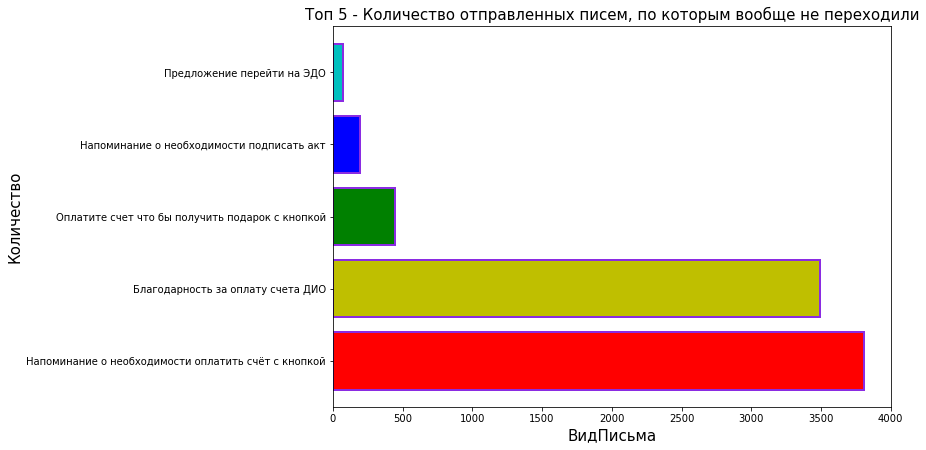

In [27]:
plt.figure(figsize=[10, 7])

plt.barh(mail_not['ВидПисьма'].head(5), mail_not['Количество писем'].head(5), edgecolor='blueviolet',
        color=['r', 'y', 'g', 'b', 'c', 'k', 
               'olive'], linewidth=2)

plt.title('Топ 5 - Количество отправленных писем, по которым вообще не переходили', fontsize=15)
plt.xlabel('ВидПисьма', fontsize=15)
plt.ylabel('Количество', fontsize=15)
# plt.xticks(rotation=90)
plt.show()

In [28]:
data_top_post=data_click.groupby(['Должность'],as_index=False) \
.aggregate({'БылКликВнешнийИсточник':"count",'Время_перехода_день':"mean",'Время_перехода_минута':"mean"}) \
.rename(columns={"БылКликВнешнийИсточник":"Количество","Время_перехода":"Среднее время перехода днях"}) \
.sort_values(by='Количество', ascending=False)
data_top_post.head(15)
#15 должонстей, которые чаще всего переходят по ссылке

,Должность,Количество,Время_перехода_день,Время_перехода_минута
3,Гл. бух.,4830,4.995859,7574.240738
23,бухгалтер,1551,5.120567,7782.921663
200,юрист,1232,3.485390,5304.710511
90,кадровик,535,7.005607,10403.382025
65,зам. гл. бух.,410,3.617073,5697.615285
40,ген. дир. и гл. бухгалтер,250,4.500000,6825.852933
110,нач. отд. кадров,211,10.781991,15928.864850
6,адвокат,124,3.072581,4691.541398
191,фин. дир.,121,3.834711,5837.917493
85,инд. предприниматель,106,3.415094,5243.876101


In [29]:
print('Вывод:')
print(round(4688/11704,2)*100,'% от всех кликов, это должность Гл. бух.')
print(round(1509/11704,2)*100,'% от всех кликов, это должность бухгалтер')
print(round(1198/11704,2)*100,'% от всех кликов, это должность юрист')

Вывод:
40.0 % от всех кликов, это должность Гл. бух.
13.0 % от всех кликов, это должность бухгалтер
10.0 % от всех кликов, это должность юрист


In [30]:
data_top_m_p=data_click[data_click['ВидПисьма']=='Аналитика'].groupby(['ВидПисьма','Должность'],as_index=False) \
.aggregate({'БылКликВнешнийИсточник':"count",'Время_перехода_день':"mean",'Время_перехода_минута':"mean"}) \
.rename(columns={"БылКликВнешнийИсточник":"Количество","Время_перехода":"Среднее время перехода днях"}) \
.sort_values(by='Количество', ascending=False)
data_top_m_p.head(10)
#10 должонстей сделавших клики,которые получили письмо на тему Аналитика

,ВидПисьма,Должность,Количество,Время_перехода_день,Время_перехода_минута
3,Аналитика,Гл. бух.,2398,3.889491,5957.583403
20,Аналитика,бухгалтер,822,4.654501,7097.369505
183,Аналитика,юрист,702,2.616809,4023.451496
82,Аналитика,кадровик,285,5.996491,8926.441404
59,Аналитика,зам. гл. бух.,212,2.952830,4698.329167
36,Аналитика,ген. дир. и гл. бухгалтер,142,2.676056,4186.031925
100,Аналитика,нач. отд. кадров,116,6.370690,9522.584052
113,Аналитика,нач. юр. отдела,70,3.714286,5551.872381
5,Аналитика,адвокат,65,1.938462,3009.176667
174,Аналитика,фин. дир.,65,3.815385,5809.108462


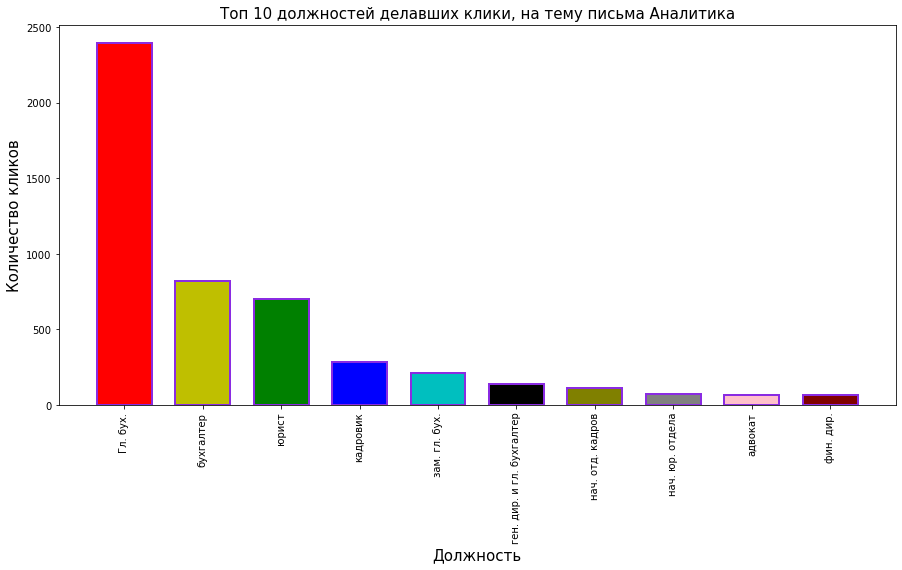

In [40]:
plt.figure(figsize=[15, 7])

plt.bar(data_top_m_p['Должность'].head(10), data_top_m_p['Количество'].head(10), width=0.7, edgecolor='blueviolet',
        color=['r', 'y', 'g', 'b', 'c', 'k', 
               'olive', 'gray', 'pink', 'maroon'], linewidth=2)

plt.title('Топ 10 должностей делавших клики, на тему письма Аналитика', fontsize=15)
plt.xlabel('Должность', fontsize=15)
plt.ylabel('Количество кликов', fontsize=15)
plt.xticks(rotation=90)

plt.show()

In [41]:
data_top_day=data[data['БылКликВнешнийИсточник']=='Да'].groupby(['День_недели_отклика'],as_index=False) \
.aggregate({'БылКликВнешнийИсточник':"count"}) \
.rename(columns={"БылКликВнешнийИсточник":"Количество"}) \
.sort_values(by='Количество', ascending=False)
data_top_day = data_top_day.astype({"День_недели_отклика": "Int64"})
data_top_day

,День_недели_отклика,Количество
2,2,4964
3,3,4297
4,4,1075
0,0,510
1,1,501
5,5,413
6,6,286


In [42]:
print('Вывод')
print(round(4853/11704,2)*100,'% От всех кликов приходятся на среду')
print(round(4141/11704,2)*100,'% От всех кликов приходятся на четверг')

Вывод
41.0 % От всех кликов приходятся на среду
35.0 % От всех кликов приходятся на четверг
